# Notebook: 01_data_exploration.ipynb

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [2]:

# Add the relative path to the directory containing data_loader.py to the system path
sys.path.append('../src')

# Import the load_data function from data_loader.py
from data_loader import load_data

/Users/adityakumar/Developer/Projects/movie-genre-classifier/notebooks/../src/data_loader.py:21: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(file_path, sep='\s*:::\s*', engine='python', names=columns)


In [3]:
# Load train and test data
train_path = "../data/raw/train_data.txt"
test_path = "../data/raw/test_data.txt"

In [4]:
print(f"Loading training data from: {train_path}")
train_df = load_data(train_path, is_train=True)
print(f"Training data loaded with {train_df.shape[0]} rows and {train_df.shape[1]} columns\n")


Loading training data from: ../data/raw/train_data.txt
Data loaded successfully from ../data/raw/train_data.txt
Shape of dataset: (54214, 4)
Training data loaded with 54214 rows and 4 columns



In [5]:
print(f"Loading test data from: {test_path}")
test_df = load_data(test_path, is_train=False)
print(f"Test data loaded with {test_df.shape[0]} rows and {test_df.shape[1]} columns\n")


Loading test data from: ../data/raw/test_data.txt
Data loaded successfully from ../data/raw/test_data.txt
Shape of dataset: (54200, 3)
Test data loaded with 54200 rows and 3 columns



In [6]:
print(train_df.shape)
print(test_df.shape)

(54214, 4)
(54200, 3)


In [7]:
# Display dataset overview
def explore_data(df, name):
    print(f"{name} Dataset Overview:")
    print(df.info(), "\n")
    print(df.describe(include='all'), "\n")
    print("Sample Data:")
    print(df.head(), "\n")
    print("Missing Values:")
    print(df.isnull().sum(), "\n")

In [8]:
explore_data(train_df, "Train")
explore_data(test_df, "Test")

Train Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None 

                  ID                         Title  Genre  \
count   54214.000000                         54214  54214   
unique           NaN                         54214     27   
top              NaN  Oscar et la dame rose (2009)  drama   
freq             NaN                             1  13613   
mean    27107.500000                           NaN    NaN   
std     15650.378084                           NaN    NaN   
min         1.000000                           NaN    NaN   
25%     13554.250000                           NaN    NaN   
50%     27107.50

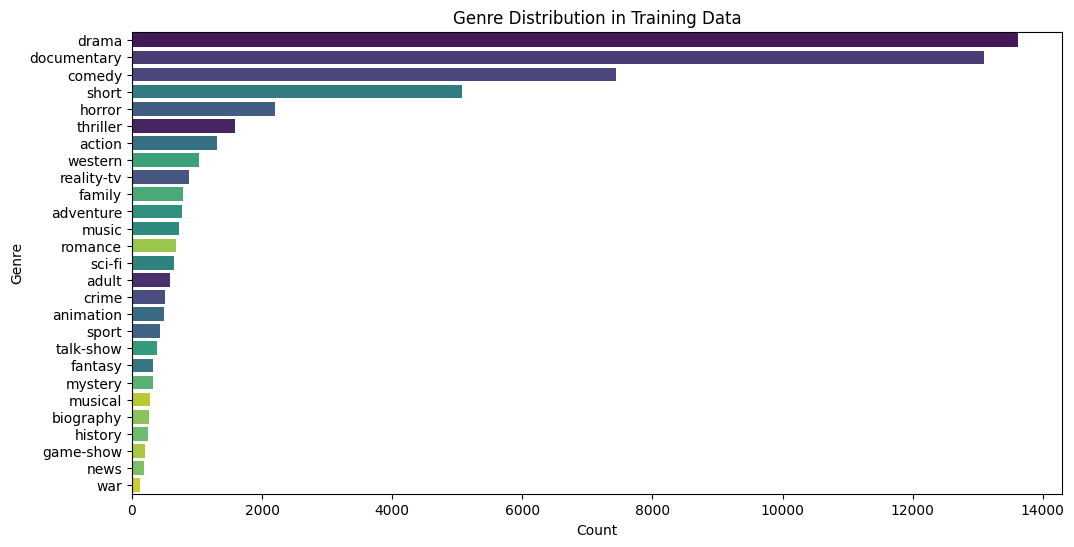

In [23]:
# Visualizing genre distribution
if "Genre" in train_df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=train_df['Genre'], order=train_df['Genre'].value_counts().index, hue=train_df['Genre'], palette="viridis", legend=False)
    plt.title("Genre Distribution in Training Data")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.show()
else:
    print("Genre column not found in training data.")